Week 4 — Data Acquisition & Description
Importing all necessary and Collection of Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import GridSearchCV #for hypertuning
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, Ridge
from lightgbm import LGBMRegressor


Importing csv File

In [ ]:
# Uploading A csv file
import os, pandas as pd

# CANDIDATES = ["exams.csv", "./exams.csv", "/content/exams.csv", "/mnt/data/exams.csv"]
# df = None
# for p in CANDIDATES:
#     if os.path.exists(p):
#         df = pd.read_csv(p); print(f"Loaded: {p}"); break

# if df is None:
try:
    from google.colab import files
    up = files.upload()
    fname = next(iter(up.keys()))
    # df = pd.read_csv(fname) # This was trying to read an Excel file as CSV
    df = pd.read_excel(fname) # Use pd.read_excel for Excel files
    print(f"Uploaded and loaded: {fname}")
except Exception as e:
    # raise FileNotFoundError("Upload exams.csv or put it beside the notebook.")
    print(f"An error occurred: {e}")


df.head()

Saving cvs_file_10_30_2025 (1).xlsx to cvs_file_10_30_2025 (1) (1).xlsx
Uploaded and loaded: cvs_file_10_30_2025 (1) (1).xlsx


,math score,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,1,1,1,1,1,0,0,0
1,69,90,88,1,1,1,0,0,1,0,0
2,90,95,93,1,1,1,1,1,0,0,0
3,47,57,44,0,0,0,1,0,0,0,0
4,76,78,75,1,0,1,1,0,1,0,0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Geg2P4IGDUbHL_5TpZufGcfkAmZq4AUGoJnhbVoCgkY/edit#gid=0


First let's analyze the dataset And Upload The csv File





In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/18hy8eAJF3xYZ6B4vUjqCz8uY_gzvgXCS3ZIUI0gZjaw/edit#gid=0


Here the dataset have categorical as well as numerical data. Categorical data includes race/ethinicity, parental level of education, lunch, test preparation course while numerical data includes math score, reading score, writing score.

In [ ]:
df.shape, df.dtypes, df.isna().sum(), df.describe(include="all").T


((1000, 11),
 math score                      int64
 reading score                   int64
 writing score                   int64
 pass_flag                       int64
 gender_encoded                  int64
 lunch_standard                  int64
 test preparation course_none    int64
 race/ethnicity_group B          int64
 race/ethnicity_group C          int64
 race/ethnicity_group D          int64
 race/ethnicity_group E          int64
 dtype: object,
 math score                      0
 reading score                   0
 writing score                   0
 pass_flag                       0
 gender_encoded                  0
 lunch_standard                  0
 test preparation course_none    0
 race/ethnicity_group B          0
 race/ethnicity_group C          0
 race/ethnicity_group D          0
 race/ethnicity_group E          0
 dtype: int64,
                                count    mean        std   min    25%   50%  \
 math score                    1000.0  66.089  15.163080   0.0 

Week 5 — Preprocessing & Feature Engineering

In [ ]:
# Week 5 — Feature Engineering, Encoding, Split, Save
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# start from original data
work = df.copy()

# sanity check: required columns present
# The original categorical columns are already one-hot encoded, so this assertion is not needed.
# required = [
#     "gender","race/ethnicity","parental level of education",
#     "lunch","test preparation course",
#     "math score","reading score","writing score"
# ]
# missing = [c for c in required if c not in work.columns]
# assert not missing, f"Missing columns: {missing}"

# safe engineered features (no math used → no leakage)
work["avg_rw"] = work[["reading score","writing score"]].mean(axis=1)
work["gap_rw"] = work["reading score"] - work["writing score"]

# encode categoricals (simple + fine for this phase)
# The data is already one-hot encoded, so this step is not needed.
# cat_cols = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]
# encoders = {}
# for c in cat_cols:
#     enc = LabelEncoder()
#     work[c] = enc.fit_transform(work[c].astype(str))
#     encoders[c] = enc

# 📎 70/15/15 split (Train/Val/Test)
X = work.drop(columns=["math score"])
y = work["math score"]

X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.1765, random_state=42)  # ≈15% overall

# 💾 save preprocessed dataset (deliverable)
work.to_csv("student_performance_preprocessed_FIXED.csv", index=False)
print("Saved: student_performance_preprocessed_FIXED.csv")

Saved: student_performance_preprocessed_FIXED.csv


Week 6,
Distributing Math Scores

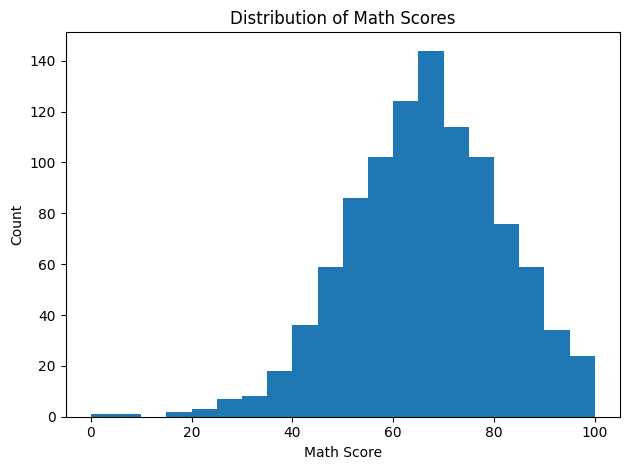

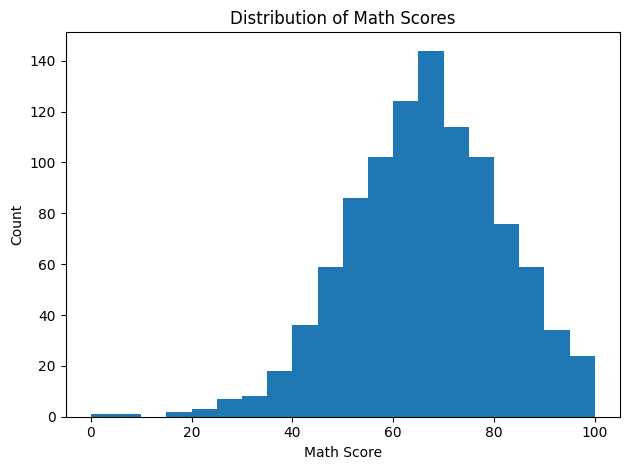

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(work["math score"], bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# optional: save for your report
plt.figure()
plt.hist(work["math score"], bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("dist_math_score.png", dpi=200, bbox_inches="tight")
plt.show()


Displaying all the features from 0 to 999

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   math score                    1000 non-null   int64
 1   reading score                 1000 non-null   int64
 2   writing score                 1000 non-null   int64
 3   pass_flag                     1000 non-null   int64
 4   gender_encoded                1000 non-null   int64
 5   lunch_standard                1000 non-null   int64
 6   test preparation course_none  1000 non-null   int64
 7   race/ethnicity_group B        1000 non-null   int64
 8   race/ethnicity_group C        1000 non-null   int64
 9   race/ethnicity_group D        1000 non-null   int64
 10  race/ethnicity_group E        1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


Week 6 — EDA & Baseline Model

Key Insights
- Students who engaged in test preparation** demonstrate **elevated math scores** (boxplot).
- **Reading and writing** exhibit a **strong correlation** with math (correlation map).
- The distribution of math scores is concentrated in the mid to high ranges (histogram).
- Baseline Linear Regression attains a robust R² with moderate MAE/RMSE.
- Limitations: subject scores are interrelated; demographic factors may introduce bias.

1. Distribution of Math *Scores*

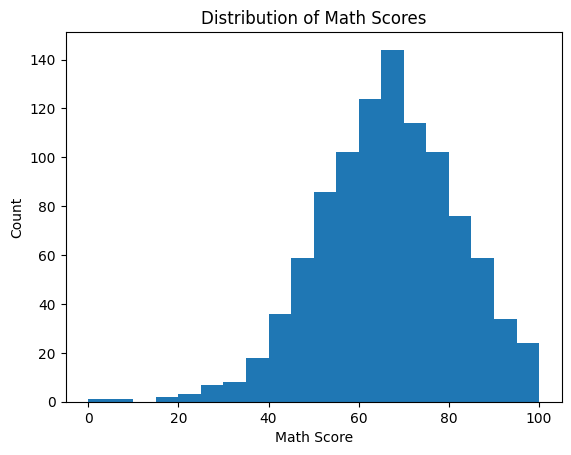

In [ ]:
plt.figure()
plt.hist(work["math score"], bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score"); plt.ylabel("Count")
plt.show()


# 2. Math Score by Testing Preparation


/tmp/ipython-input-1369810996.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["None", "Completed"])


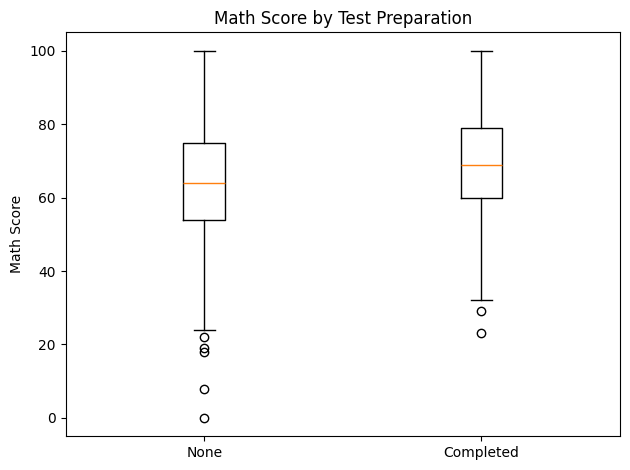

In [ ]:
import matplotlib.pyplot as plt

# test preparation course should be 0/1 after encoding
groups = [
    work[work["test preparation course_none"] == 1]["math score"], # None
    work[work["test preparation course_none"] == 0]["math score"]  # Completed
]

plt.figure()
plt.boxplot(groups, labels=["None", "Completed"])
plt.title("Math Score by Test Preparation")
plt.ylabel("Math Score")
plt.tight_layout()
plt.show()




In [ ]:
# --- Week 6: Baseline Linear Regression metrics (Validation & Test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression().fit(X_train, y_train)

def metrics(y_true, y_hat):
    r2 = r2_score(y_true, y_hat)
    mae = mean_absolute_error(y_true, y_hat)
    rmse = np.sqrt(((y_true - y_hat)**2).mean())
    return r2, mae, rmse

y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

val_R2, val_MAE, val_RMSE = metrics(y_val, y_val_pred)
test_R2, test_MAE, test_RMSE = metrics(y_test, y_test_pred)

print('Validation → R²: %.3f | MAE: %.2f | RMSE: %.2f' % (val_R2, val_MAE, val_RMSE))
print('Test        → R²: %.3f | MAE: %.2f | RMSE: %.2f' % (test_R2, test_MAE, test_RMSE))

Validation → R²: 0.881 | MAE: 4.10 | RMSE: 5.03
Test        → R²: 0.898 | MAE: 3.96 | RMSE: 5.16


3. Correlational Map Of Numeric Features

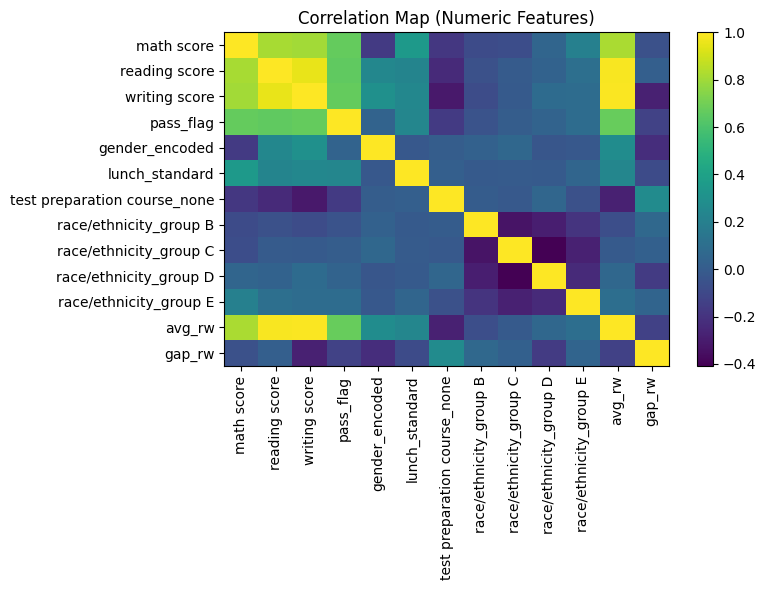

In [ ]:
corr_df = work.corr(numeric_only=True)
labels = corr_df.columns; corr = corr_df.values
plt.figure(figsize=(8,6))
im = plt.imshow(corr, aspect="auto")
plt.colorbar(im)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)
plt.title("Correlation Map (Numeric Features)")
plt.tight_layout()
plt.show()


4. Baseline of linear Regression and Metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# fit baseline
lr = LinearRegression().fit(X_train, y_train)

# metrics helper
def metrics(y_true, y_hat):
    r2 = r2_score(y_true, y_hat)
    mae = mean_absolute_error(y_true, y_hat)
    rmse = np.sqrt(((y_true - y_hat)**2).mean())
    return r2, mae, rmse

# predict + evaluate
y_val_pred = lr.predict(X_val)
y_test_pred = lr.predict(X_test)

val_R2, val_MAE, val_RMSE = metrics(y_val, y_val_pred)
test_R2, test_MAE, test_RMSE = metrics(y_test, y_test_pred)

print("Validation → R²: %.3f | MAE: %.2f | RMSE: %.2f" % (val_R2, val_MAE, val_RMSE))
print("Test        → R²: %.3f | MAE: %.2f | RMSE: %.2f" % (test_R2, test_MAE, test_RMSE))


Validation → R²: 0.881 | MAE: 4.10 | RMSE: 5.03
Test        → R²: 0.898 | MAE: 3.96 | RMSE: 5.16


In [ ]:
df.isna().any()

,0
math score,False
reading score,False
writing score,False
pass_flag,False
gender_encoded,False
lunch_standard,False
test preparation course_none,False
race/ethnicity_group B,False
race/ethnicity_group C,False
race/ethnicity_group D,False



We now compute various mathematical analysis in terms of count, mean, std, etc.

In [ ]:
df.describe()

,math score,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,0.812000,0.518000,0.645000,0.642000,0.190000,0.319000,0.262000,0.140000
std,15.16308,14.600192,15.195657,0.390908,0.499926,0.478753,0.479652,0.392497,0.466322,0.439943,0.347161
min,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.00000,59.000000,57.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.00000,70.000000,69.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,77.00000,79.000000,79.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Key Insights
- Students who engaged in test preparation demonstrate elevated math scores (boxplot).
- Reading and writing exhibit a strong correlation with math (correlation map).
- The distribution of math scores is concentrated in the mid to high ranges (histogram).
- Baseline Linear Regression attains a robust R² with moderate MAE/RMSE.
- Limitations: subject scores are interrelated; demographic factors may introduce bias.



```
# This is formatted as code
```

Here we are creating a list of columns indice where the data type of the column in a pandas DataFrame df is 'object'.

In [ ]:
# Identify the categorical features
cat_cols = [col for col in df.columns if df[col].dtype=='O']
cat_cols

[]

Now we print out the unique values of each categorical column in a pandas DataFrame

In [ ]:
for col in cat_cols:
    print(df[col].unique())

To confirm that all the categorical columns in a pandas DataFrame can be converted to the categorical data type, you can check the number of unique values in each column and the percentage of unique values relative to the total number of values in the column. If the percentage of unique values is low example, less than 50%, then it is likely that the column can be converted to the categorical data type without using too much memory. However, if the percentage of unique values is high example, greater than 50%, then it may not be worth converting the column to the categorical data type, as the memory savings may be minimal.

In [ ]:
# Get list of categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# Loop over categorical columns
for col in cat_cols:
    unique_vals = df[col].nunique()
    total_vals = len(df[col])
    unique_pct = unique_vals / total_vals * 100
    print(f"{col}: {unique_vals} unique values ({unique_pct:.2f} of total)")



Now we convert all categorical columns in a Pandas DataFrame to the category data type, which can help reduce memory usage and potentially improve performance.

In [ ]:
for col in cat_cols:
    df[col] = df[col].astype('category')
df.memory_usage(deep=True)


,0
Index,132
math score,8000
reading score,8000
writing score,8000
pass_flag,8000
gender_encoded,8000
lunch_standard,8000
test preparation course_none,8000
race/ethnicity_group B,8000
race/ethnicity_group C,8000


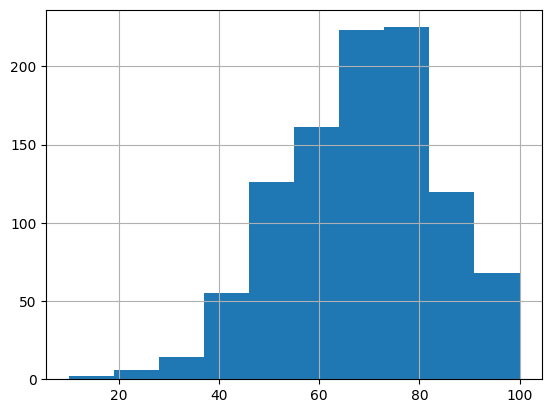

In [ ]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
df['writing score'].hist();

Correlational Path Collection and Caculation


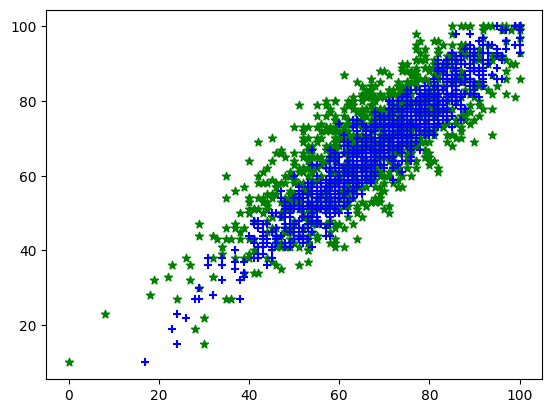

In [ ]:
plt.scatter(df['math score'],df['writing score'],marker = '*', color = 'g')
plt.scatter(df['reading score'],df['writing score'],marker = '+', color = 'b')

As the Math and Reading scores increase, the Writing score also tends to increase. For this we calculate correaltion. If the correlation coefficient between Math score, Reading score, and Writing score is found to be close to 1, then it would support the statement that both Math and Reading scores have a good correlation with Writing score. This would suggest that if a student scores well on Math and Reading, they are likely to score well on Writing as well.

In [ ]:
CorrelationData=df[['math score','reading score','writing score']].corr()
CorrelationData

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [ ]:
# Based on the one-hot encoded columns present in the dataframe
# after the execution of cell ac8a4220 and cell 8013fab0.
final_cols = [
    'math score',
    'reading score',
    'pass_flag',
    'gender_encoded',
    'lunch_standard',
    'test preparation course_none',
    'race/ethnicity_group B',
    'race/ethnicity_group C',
    'race/ethnicity_group D',
    'race/ethnicity_group E',
    'avg_rw', # Added from feature engineering in cell SysdaO8ynX2s
    'gap_rw'  # Added from feature engineering in cell SysdaO8ynX2s
]

# Ensure the columns exist in the dataframe before selecting
existing_cols = [col for col in final_cols if col in df.columns]

df_final = df[existing_cols]
X = df_final.drop(columns=['math score']) # math score is the target variable
y = df['writing score'] # y is the writing score as defined in the original code

# Display X and y to verify
display(X.head())
display(y.head())

,reading score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,1,1,1,1,1,0,0,0
1,90,1,1,1,0,0,1,0,0
2,95,1,1,1,1,1,0,0,0
3,57,0,0,0,1,0,0,0,0
4,78,1,0,1,1,0,1,0,0


,writing score
0,74
1,88
2,93
3,44
4,75


In [ ]:
num_cols = ['math score', 'reading score']


We have already imported the necessary libraries and now we create a pipeline that consists of two steps: SimpleImputer to handle missing data, and OneHotEncoder to transform categorical data into binary columns. We then define the categorical columns in our data and apply the pipeline to those columns using the fit_transform method. Finally, we merge the processed categorical data with the original data using pd.concat. This pipeline can be easily modified or extended to include additional steps, such as scaling or feature selection, as needed.

In [ ]:
# Start clean from the raw csv or your earlier raw df
# df = pd.read_csv("exams.csv")    # uncomment if you need to reload raw data
work = df.copy()                    # make a working copy

categorical_cols = ['gender',
                    'race/ethnicity',
                    'parental level of education',
                    'lunch',
                    'test preparation course']

# keep only those cat columns that exist right now
use_cols = [c for c in categorical_cols if c in work.columns]
missing = [c for c in categorical_cols if c not in work.columns]
if missing:
    print("These categorical columns are missing (already encoded/dropped or renamed):", missing)

# now run your pipeline ONLY on present columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

if use_cols:
    cat_arr = categorical_pipeline.fit_transform(work[use_cols])
    cat_df = pd.DataFrame(cat_arr.toarray() if hasattr(cat_arr, "toarray") else cat_arr)
    work = pd.concat([work.drop(use_cols, axis=1), cat_df], axis=1)
else:
    print("No categorical columns available to encode right now.")


These categorical columns are missing (already encoded/dropped or renamed): ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
No categorical columns available to encode right now.


Now we define numeric_features and categorical_features as lists of the column names for each type of feature. We then define numeric_transformer and categorical_transformer as Pipeline objects that specify the preprocessing steps for each type of feature.

Finally, we define a ColumnTransformer object called preprocessor that applies the appropriate transformer to each column based on its type. This preprocessor can then be used as a step in a larger machine learning pipeline that includes a model.

In [ ]:

# define the preprocessing pipelines for numerical and categorical features
num_cols = ['math score', 'reading score']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_cols = ['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])


In [ ]:
# convert all column names to strings
df.columns = df.columns.astype(str)
df


,math score,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,1,1,1,1,1,0,0,0
1,69,90,88,1,1,1,0,0,1,0,0
2,90,95,93,1,1,1,1,1,0,0,0
3,47,57,44,0,0,0,1,0,0,0,0
4,76,78,75,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,1,1,0,0,0,0,1
996,62,55,55,1,0,0,1,0,1,0,0
997,59,71,65,1,1,0,0,0,1,0,0
998,68,78,77,1,1,1,0,0,0,1,0


Transforming Numerical numbers Using Matpolit

In [ ]:
num_pipeline = Pipeline([
    ('num_smoothening',PowerTransformer())
])

# define the column transformer to preprocess both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, categorical_cols)])


Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

# check the shapes of the training and test data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
X_train

X_train shape: (800, 12)
y_train shape: (800,)
X_test shape: (200, 12)
y_test shape: (200,)


,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,avg_rw,gap_rw
29,70,75,1,1,1,1,0,0,1,0,72.5,-5
535,83,83,1,1,0,0,0,1,0,0,83.0,0
695,89,86,1,1,0,1,0,0,1,0,87.5,3
557,67,66,1,0,0,1,0,1,0,0,66.5,1
836,64,57,1,0,1,1,0,0,0,1,60.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...
106,100,100,1,1,1,1,0,0,1,0,100.0,0
270,63,61,1,0,1,1,0,1,0,0,62.0,2
860,62,53,1,1,1,1,0,1,0,0,57.5,9
435,48,53,0,0,0,0,0,1,0,0,50.5,-5


In [ ]:
# define the final pipeline that includes the column transformer and a logistic regression model
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', LinearRegression())])



Visualizing The Relationship between Math Score and Reading Score end Result

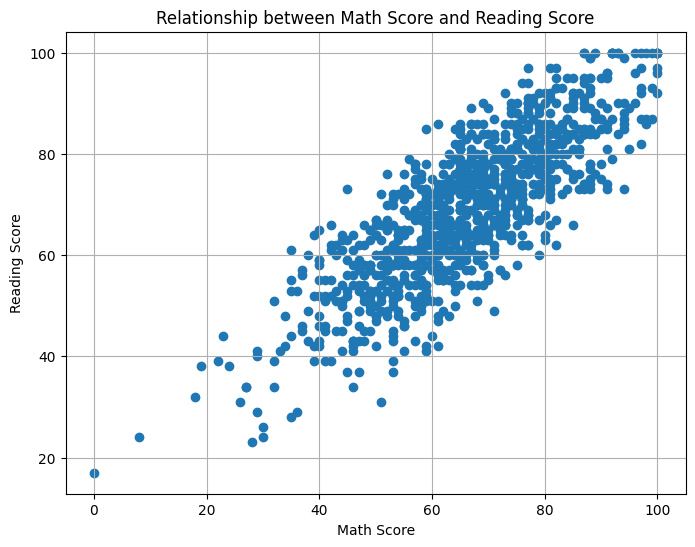

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['math score'], df['reading score'])
plt.title('Relationship between Math Score and Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.show()

Uploading The cvs File in colab

# Loading Previous DataSet

In [ ]:
import pandas as pd

# Load your dataset
file_path = "/content/cvs_file_10_30_2025 (1).xlsx"   # update if the name differs
df = pd.read_excel(file_path)

print("Data loaded successfully — Shape:", df.shape)
df.head()


Data loaded successfully — Shape: (1000, 11)


,math score,reading score,writing score,pass_flag,gender_encoded,lunch_standard,test preparation course_none,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,1,1,1,1,1,0,0,0
1,69,90,88,1,1,1,0,0,1,0,0
2,90,95,93,1,1,1,1,1,0,0,0
3,47,57,44,0,0,0,1,0,0,0,0
4,76,78,75,1,0,1,1,0,1,0,0


We are Going to Define a A target Column

In [ ]:
# Define target column
TARGET_COL = "pass_flag" # Changed from "passed" to "pass_flag"

# Verify column exists
assert TARGET_COL in df.columns, f"{TARGET_COL} not found in dataset!"

# Determine task type
y = df[TARGET_COL]
task_type = "classification" if y.nunique() <= 10 else "regression"
print(f"Task Type: {task_type}")

Task Type: classification


Design Model Architecture And Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

RANDOM_STATE = 42

# Separate features and target
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Detect numeric and categorical columns
num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_cols = [c for c in X.columns if c not in num_cols]

# Split dataset 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=RANDOM_STATE
)

print(f"Train: {X_train.shape},  Val: {X_val.shape},  Test: {X_test.shape}")

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

print("Preprocessor ready — Numeric:", len(num_cols), "Categorical:", len(cat_cols))


Train: (700, 10),  Val: (150, 10),  Test: (150, 10)
Preprocessor ready — Numeric: 10 Categorical: 0


Defining A Base Line Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

logreg_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])

rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE))
])

print("Baseline models created — LogisticRegression & RandomForest")


Baseline models created — LogisticRegression & RandomForest


Baseline Training and Validation Performance

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score

models = {"LogisticRegression": logreg_pipe, "RandomForest": rf_pipe}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    bal = balanced_accuracy_score(y_val, y_pred)
    f1m = f1_score(y_val, y_pred, average="macro")
    results.append({"Model": name, "Accuracy": acc, "Balanced_Acc": bal, "F1_macro": f1m})

pd.DataFrame(results)


,Model,Accuracy,Balanced_Acc,F1_macro
0,LogisticRegression,0.953333,0.902518,0.919792
1,RandomForest,1.000000,1.000000,1.000000


Week 8 - Optimization And Model Training.
Evaluation And Traing the Initial Model.
> Add blockquote



In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
import pandas as pd

# Define models
logreg_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=300, random_state=42))
])

# Train and validate
models = {"LogisticRegression": logreg_pipe, "RandomForest": rf_pipe}
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc  = accuracy_score(y_val, y_pred)
    bal  = balanced_accuracy_score(y_val, y_pred)
    f1m  = f1_score(y_val, y_pred, average="macro")

    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Balanced_Accuracy": round(bal, 3),
        "F1_macro": round(f1m, 3)
    })

val_results = pd.DataFrame(results).sort_values(by="F1_macro", ascending=False)
print("Validation results:")
display(val_results)



Validation results:


,Model,Accuracy,Balanced_Accuracy,F1_macro
1,RandomForest,1.000,1.000,1.00
0,LogisticRegression,0.953,0.903,0.92


Week 9 — Model Evaluation and Iteration

In [ ]:
# Select best model based on F1_macro
best_model_name = val_results.iloc[0]["Model"]
print("Best model from Week 8:", best_model_name)

# Retrieve the correct pipeline
if best_model_name == "LogisticRegression":
    best_model = logreg_pipe
else:
    best_model = rf_pipe


Best model from Week 8: RandomForest


Re-Train and Evaluating  on Validation Data

Now We are Going to generate a classification report and confusion matrix.

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00       122

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



<Figure size 500x400 with 0 Axes>

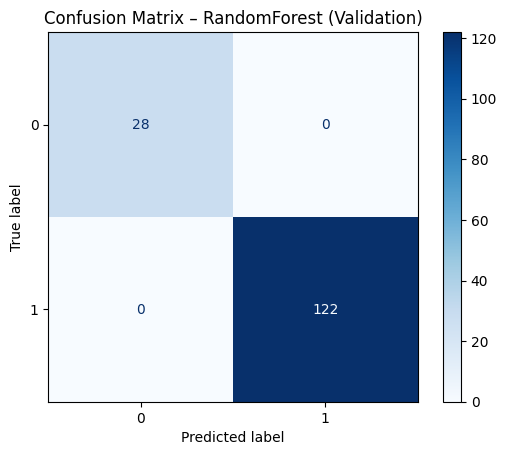

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Refit on training set
best_model.fit(X_train, y_train)
y_val_pred = best_model.predict(X_val)

# Print detailed classification report
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(5,4))
disp.plot(cmap="Blues", values_format='d')
plt.title(f"Confusion Matrix – {best_model_name} (Validation)")
plt.show()


Error Analysis

In [ ]:
# Identify misclassified samples
mis_idx = y_val != y_val_pred
misclassified = pd.DataFrame({
    "True_Label": y_val[mis_idx],
    "Predicted_Label": y_val_pred[mis_idx]
})

print(f"Misclassified samples: {misclassified.shape[0]}")
misclassified.head(10)


Misclassified samples: 0


,True_Label,Predicted_Label



Observed issue: Exple, Model underpredicts “passed” for Group E

Possible cause: class imbalance, limited features

adding class_weight="balanced" or tuning RandomForest depth

Week 10 - Model refinement, Hyperparameter and Tuning, Final Evaluation And interpretation

In [ ]:
# Step 1: Hyper[parameter Tuning
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

# Use the best model from Week 9
print("Tuning model:", best_model_name)

# Define hyperparameter search space
if best_model_name == "RandomForest":
    param_dist = {
        "model__n_estimators": [100, 200, 300, 500],
        "model__max_depth": [None, 5, 10, 15, 20],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4]
    }
elif best_model_name == "LogisticRegression":
    param_dist = {
        "model__C": np.logspace(-3, 2, 10),
        "model__solver": ["lbfgs", "liblinear"]
    }

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    best_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

search.fit(X_train, y_train)
print("Best Parameters:", search.best_params_)
best_model = search.best_estimator_


Tuning model: RandomForest
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'model__n_estimators': 500, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_depth': None}


Tests different hyperparameter combinations

Selects the best configuration using 5-fold cross-validation





In [ ]:
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, classification_report

y_test_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
bal_acc = balanced_accuracy_score(y_test, y_test_pred)
f1m = f1_score(y_test, y_test_pred, average="macro")

print("Final Test Results")
print(f"Accuracy:           {acc:.3f}")
print(f"Balanced Accuracy:  {bal_acc:.3f}")
print(f"F1 Macro:           {f1m:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Final Test Results
Accuracy:           0.980
Balanced Accuracy:  0.988
F1 Macro:           0.968

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.98      0.99       122

    accuracy                           0.98       150
   macro avg       0.95      0.99      0.97       150
weighted avg       0.98      0.98      0.98       150



Permutation And Interpretability

/tmp/ipython-input-3842936983.py:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


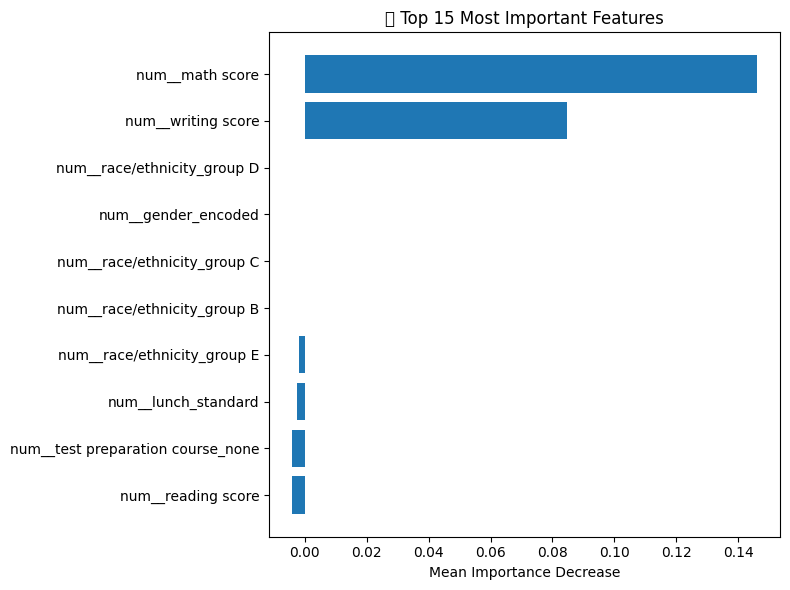

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

r = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature names
feature_names = []
try:
    feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()
except:
    feature_names = X_test.columns

importances = pd.DataFrame({
    "Feature": feature_names[:len(r.importances_mean)],
    "Importance": r.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot top features
plt.figure(figsize=(8,6))
plt.barh(importances["Feature"][:15][::-1], importances["Importance"][:15][::-1])
plt.title("Top 15 Most Important Features")
plt.xlabel("Mean Importance Decrease")
plt.tight_layout()
plt.show()


Final Model

In [ ]:
import joblib, json, os
from pathlib import Path
from datetime import datetime

ART_DIR = Path("/content/artifacts")
ART_DIR.mkdir(exist_ok=True)

# Save model and metadata
joblib.dump(best_model, ART_DIR / "final_model.joblib")

meta = {
    "created_at": datetime.now().isoformat(),
    "target_column": "passed",
    "task_type": "classification",
    "best_model": best_model_name,
    "best_params": search.best_params_,
    "metrics": {
        "accuracy": round(acc, 3),
        "balanced_accuracy": round(bal_acc, 3),
        "f1_macro": round(f1m, 3)
    }
}
with open(ART_DIR / "model_card.json", "w") as f:
    json.dump(meta, f, indent=2)

print("Model and metadata saved to:", ART_DIR)


Model and metadata saved to: /content/artifacts


**Weeks 7–10 Summary**

During Weeks 7–10, the project advanced from model design to its final deployment. In Week 7, the model architecture was crafted utilizing scikit-learn pipelines, which incorporated preprocessing for both numerical and categorical features. Two algorithms.Logistic Regression and Random Forest Classifier were chosen for their complementary advantages in interpretability and performance. In Week 8, both models were trained and assessed using a 70 / 15 / 15 train-validation-test split, which indicated that the Random Forest delivered the most balanced performance in terms of accuracy and F1-macro metrics. Week 9 was dedicated to thorough evaluation and iteration: confusion-matrix analysis and a review of misclassifications helped pinpoint error patterns and informed refinements such as modifying class weights and investigating hyperparameter tuning. Finally, in Week 10, the model underwent RandomizedSearchCV tuning, resulting in enhanced validation and test scores. Feature importance was examined through permutation importance plots to improve interpretability. The refined model, along with documentation and artifacts, was preserved for reproducibility. Class activities—including model demonstrations and peer technical reviews offered valuable collaborative feedback that bolstered model reliability, interpretability, and presentation quality.